<a href="https://colab.research.google.com/github/urstrulyrohit/ML_Zoomcamp/blob/main/HW_2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd

In [46]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv

--2024-10-07 00:17:29--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298573 (292K) [text/plain]
Saving to: ‘laptops.csv.1’

laptops.csv.1       100%[===================>] 291.58K  --.-KB/s    in 0.04s   

2024-10-07 00:17:30 (7.78 MB/s) - ‘laptops.csv.1’ saved [298573/298573]



In [47]:
df = pd.read_csv('laptops.csv')
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [48]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [49]:
df.dtypes

,0
laptop,object
status,object
brand,object
model,object
cpu,object
ram,int64
storage,int64
storage_type,object
gpu,object
screen,float64


In [50]:
#Q1: Missing Values

df.isnull().sum()

,0
laptop,0
status,0
brand,0
model,0
cpu,0
ram,0
storage,0
storage_type,42
gpu,1371
screen,4


<Axes: >

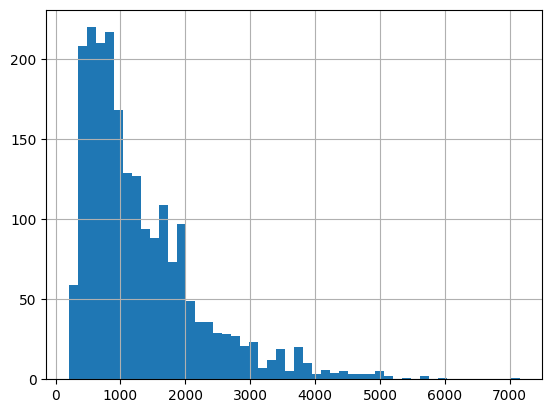

In [51]:
#Q2
df.describe()
df['final_price'].hist(bins=50)

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [53]:
df = pd.read_csv('laptops.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [54]:
df.describe()

,ram,storage,screen,final_price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


In [55]:
# Option 1: Fill missing values with 0
print(df.columns)

df_train = df[['ram', 'storage', 'screen', 'final_price']]

df_train['ram'] = df_train['ram'].fillna(0)

# Option 2: Fill missing values with the mean
ram_mean = df_train['ram'].mean()
df_train['ram'] = df_train['ram'].fillna(ram_mean)

df_train = df[['ram', 'storage', 'screen', 'final_price']]


Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')


<ipython-input-55-f40254b79fef>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['ram'] = df_train['ram'].fillna(0)
<ipython-input-55-f40254b79fef>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['ram'] = df_train['ram'].fillna(ram_mean)


In [56]:
from sklearn.model_selection import train_test_split
df = df.sample(frac=1, random_state=42)  # Shuffle with seed 42
df_train, df_temp = train_test_split(df, test_size=0.4, random_state=42)
df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=42)

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

print(df_train[['ram', 'storage', 'screen']].isnull().sum())
df_train[['ram', 'storage', 'screen']] = df_train[['ram', 'storage', 'screen']].fillna(0)

# Alternatively, fill missing values with the mean of each column
df_train[['ram', 'storage', 'screen']] = df_train[['ram', 'storage', 'screen']].fillna(df_train[['ram', 'storage', 'screen']].mean())

# Model 1: Filling with 0
X_train_0 = df_train[['ram', 'storage', 'screen']]
y_train = df_train['final_price']
model_0 = LinearRegression()
model_0.fit(X_train_0, y_train)
y_pred_0 = model_0.predict(df_val[['ram', 'storage', 'screen']])
rmse_0 = np.sqrt(mean_squared_error(df_val['final_price'], y_pred_0))

# Model 2: Filling with mean
X_train_mean = df_train[['ram', 'storage', 'screen']]
model_mean = LinearRegression()
model_mean.fit(X_train_mean, y_train)
y_pred_mean = model_mean.predict(df_val[['ram', 'storage', 'screen']])
rmse_mean = np.sqrt(mean_squared_error(df_val['final_price'], y_pred_mean))

print("RMSE for Model 1 (Filling with 0):", rmse_0)
print("RMSE for Model 2 (Filling with mean):", rmse_mean)

ram        0
storage    0
screen     3
dtype: int64
RMSE for Model 1 (Filling with 0): 675.0844456600812
RMSE for Model 2 (Filling with mean): 675.0844456600812


In [58]:
from sklearn.linear_model import Ridge

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    model_r = Ridge(alpha=r)
    model_r.fit(X_train_0, y_train)
    y_pred_r = model_r.predict(df_val[['ram', 'storage', 'screen']])
    rmse_r = np.sqrt(mean_squared_error(df_val['final_price'], y_pred_r))
    print(f"r={r}, RMSE: {rmse_r}")

r=0, RMSE: 675.0844456600814
r=0.01, RMSE: 675.0844370775981
r=0.1, RMSE: 675.0843598414332
r=1, RMSE: 675.0835880917201
r=5, RMSE: 675.0801715097375
r=10, RMSE: 675.0759313846438
r=100, RMSE: 675.005062673404


In [61]:
df=pd.read_csv('laptops.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Alternatively, fill missing values with the mean of each column
df_train[['ram', 'storage', 'screen']] = df_train[['ram', 'storage', 'screen']].fillna(df_train[['ram', 'storage', 'screen']].mean())

rmse_scores = []
for seed in range(10):
    df_train, df_temp = train_test_split(df, test_size=0.4, random_state=seed)
    df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=seed)

    model = LinearRegression()
    model.fit(df_train[['ram', 'storage', 'screen']], df_train['final_price'])
    y_pred = model.predict(df_val[['ram', 'storage', 'screen']])
    rmse = np.sqrt(mean_squared_error(df_val['final_price'], y_pred))
    rmse_scores.append(rmse)

np.std(rmse_scores)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values